<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/SpecialTopicsML-Winter2022/blob/main/SEP_787_Course_Project_Neelanjan_Goswami%2C_Sumanth_Bhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEP 787 Course Project Comparing Classifiers

# Project Members:
  *   Sumanth Mahabaleshwar Bhat
  *   Neelanjan Goswami



# Project Objective:
To compare the results derived from the classifications and obtain the below results:
  1.  Computational times for both training and testing
  2.  Cross Validation for parameter selection
  3.  Plot and compare ROC (Receiver Operating Characteristic) curves
  4.  Confusion matrix of results from each classifier

# Dataset:
  *   URL: http://archive.ics.uci.edu/ml/datasets/HTRU2
  *   HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:
  1.  Mean of the integrated profile.
  2.  Standard deviation of the integrated profile.
  3.  Excess kurtosis of the integrated profile.
  4.  Skewness of the integrated profile.
  5.  Mean of the DM-SNR curve.
  6.  Standard deviation of the DM-SNR curve.
  7.  Excess kurtosis of the DM-SNR curve.
  8.  Skewness of the DM-SNR curve.
  9.  Class

# Algorithms Used

  1.   KNN
  2.   Naive Bayes
  3.   SVM
  4.   Adaboost





# Loading the Libraries

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To ignore non-error warnings
import warnings
warnings.filterwarnings('ignore')

# Loading K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Loading Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Loading AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Loading Support Vector Machine (SVM)
from sklearn.svm import SVC

# For Metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
import time

# Test Train model selection & Cross validation score
from sklearn.model_selection import train_test_split, cross_val_score
# Precision_score, Recall_score, Confusion_matrix, Accuracy_score, F1_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# Mean_absolute_error, Mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv('HTRU_2.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
# Shape of the dataset
data.shape

(17898, 9)

In [ ]:
# Finding the precence of Null values in the Dataset (Handling Null Values)
data.isnull().sum().sort_values(ascending=False)

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64

In [ ]:
# Finding the percentage of NaN values
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column_Name': data.columns,'% Missing': percent_missing})
missing_value_df.sort_values(by='% Missing', ascending=False)

,Column_Name,% Missing
Mean of the integrated profile,Mean of the integrated profile,0.0
Standard deviation of the integrated profile,Standard deviation of the integrated profile,0.0
Excess kurtosis of the integrated profile,Excess kurtosis of the integrated profile,0.0
Skewness of the integrated profile,Skewness of the integrated profile,0.0
Mean of the DM-SNR curve,Mean of the DM-SNR curve,0.0
Standard deviation of the DM-SNR curve,Standard deviation of the DM-SNR curve,0.0
Excess kurtosis of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,0.0
Skewness of the DM-SNR curve,Skewness of the DM-SNR curve,0.0
Class,Class,0.0


# Defining Features and Target

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

print("\nShape of the Features: ", features.shape)
print("Columns in the Features: ", features.columns)

print("\nShape of the Target: ", target.shape)
print("Type of the Target: ", type(target))


Shape of the Features:  (17898, 8)
Columns in the Features:  Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve'],
      dtype='object')

Shape of the Target:  (17898,)
Type of the Target:  <class 'pandas.core.series.Series'>


# Defining and Splitting the data into Training & Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 1124)

In [ ]:
X_train.shape

(13423, 8)

In [ ]:
X_test.shape

(4475, 8)

# Classification with KNN Classifier

In [ ]:
# Training a KNN classifier with 50 neighbors
k_neighbors = 50

# Model Fit
start_time = time.time()
KNN_model = KNeighborsClassifier(n_neighbors = k_neighbors).fit(X_train, y_train);
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))
KNN_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = KNN_model.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time  : {:.2}".format(elapsed_time))
KNN_testing_time = elapsed_time

# Model Evaluation
KNN_Accuracy         = accuracy_score(y_test, y_predicted)
KNN_Recall           = recall_score(y_test, y_predicted, average = "weighted")
KNN_Precision        = precision_score(y_test, y_predicted, average = "weighted")
KNN_Score            = f1_score(y_test, y_predicted, average = 'micro')
KNN_Confusion_Matrix = confusion_matrix(y_test, y_predicted)
KNN_Cross_Val        = cross_val_score(KNeighborsClassifier(n_neighbors = k_neighbors), X_train, y_train, cv = 10)

Training Time    : 0.033
Testing Time  : 0.25


True Negative    :  4033
False Negative   :  94
True Positive    :  326
False Positive   :  22

Accuracy         :  0.9740782122905028
Recall           :  0.9740782122905028
Precision        :  0.9734275325175813
F1 Score         :  0.9740782122905027

Test-set R-square value : 0.97

Cross Validation :  [0.96872673 0.97691735 0.97468354 0.9709389  0.97168405 0.97391952
 0.98211624 0.96348733 0.96944858 0.96721311]

Confusion Matrix : 
[[4033   22]
 [  94  326]]


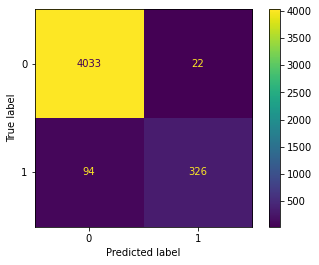

In [ ]:
print("True Negative    : ", KNN_Confusion_Matrix[0,0])
print("False Negative   : ", KNN_Confusion_Matrix[1,0])
print("True Positive    : ", KNN_Confusion_Matrix[1,1])
print("False Positive   : ", KNN_Confusion_Matrix[0,1])

print("\nAccuracy         : ", KNN_Accuracy)
print("Recall           : ", KNN_Recall)
print("Precision        : ", KNN_Precision)
print("F1 Score         : ", KNN_Score)

print("\nTest-set R-square value : {:.2f}".format(KNN_model.score(X_test, y_test)))
print("\nCross Validation : ", KNN_Cross_Val)
print("\nConfusion Matrix : ")
print(KNN_Confusion_Matrix)
plot_confusion_matrix(KNN_model, X_test, y_test)


 Plotting KNN ROC Curve:


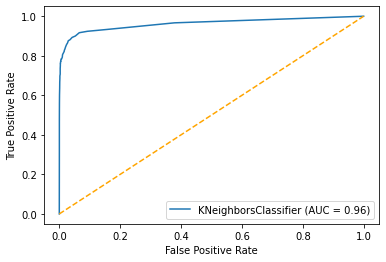

In [ ]:
print("\n Plotting KNN ROC Curve:")
metrics.plot_roc_curve(KNN_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with Naive Bayes Classifier

In [ ]:
# Model Fit
start_time = time.time()
Naive_Bayes_model = GaussianNB().fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Training Time: {:.2}".format(elapsed_time))
Naive_Bayes_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = Naive_Bayes_model.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time: {:.2}".format(elapsed_time))
Naive_Bayes_testing_time = elapsed_time

# Model Evaluation
Naive_Bayes_Accuracy         = accuracy_score(y_test, y_predicted)
Naive_Bayes_Recall           = recall_score(y_test, y_predicted, average = "weighted")
Naive_Bayes_Precision        = precision_score(y_test, y_predicted, average = "weighted")
Naive_Bayes_Score            = f1_score(y_test, y_predicted, average = 'micro')
Naive_Bayes_Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Naive_Bayes_Cross_Val        = cross_val_score(GaussianNB(), X_train, y_train, cv = 10)

Training Time: 0.0091
Testing Time: 0.0067


True Negative    :  3887
False Negative   :  66
True Positive    :  354
False Positive   :  168

Accuracy         :  0.9477094972067039
Recall           :  0.9477094972067039
Precision        :  0.9546647096838049
F1 Score         :  0.9477094972067039

Test-set R-square value : 0.95
Cross Validation :  [0.94936709 0.95160089 0.93968727 0.9485842  0.94113264 0.94560358
 0.94634873 0.93368107 0.94411326 0.94411326]

Confusion Matrix : 
[[3887  168]
 [  66  354]]


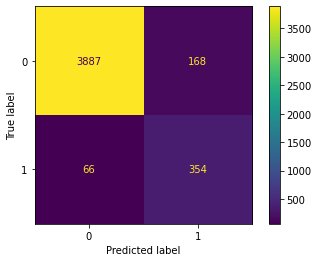

In [ ]:
print("True Negative    : ", Naive_Bayes_Confusion_Matrix[0,0])
print("False Negative   : ", Naive_Bayes_Confusion_Matrix[1,0])
print("True Positive    : ", Naive_Bayes_Confusion_Matrix[1,1])
print("False Positive   : ", Naive_Bayes_Confusion_Matrix[0,1])

print("\nAccuracy         : ", Naive_Bayes_Accuracy)
print("Recall           : ", Naive_Bayes_Recall)
print("Precision        : ", Naive_Bayes_Precision)
print("F1 Score         : ", Naive_Bayes_Score)

print("\nTest-set R-square value : {:.2f}".format(Naive_Bayes_model.score(X_test, y_test)))

print("Cross Validation : ", Naive_Bayes_Cross_Val)

print("\nConfusion Matrix : ")
print(Naive_Bayes_Confusion_Matrix)
plot_confusion_matrix(Naive_Bayes_model, X_test, y_test)


 Plotting Naive Bayes ROC Curve:


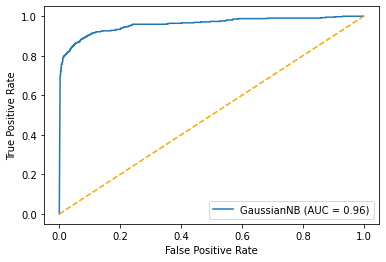

In [ ]:
print("\n Plotting Naive Bayes ROC Curve:")
metrics.plot_roc_curve(Naive_Bayes_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with SVM Classifier

In [ ]:
#  Creating Model with configuration
SVM_model = SVC(kernel='rbf')

# Model Fit
start_time = time.time()
SVM_model.fit(X = X_train, y = y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))
SVM_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = SVM_model.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time  : {:.2}".format(elapsed_time))
SVM_testing_time = elapsed_time

# Model Evaluation
SVM_Accuracy         = accuracy_score(y_test, y_predicted)
SVM_Recall           = recall_score(y_test, y_predicted, average = "weighted")
SVM_Precision        = precision_score(y_test, y_predicted, average = "weighted")
SVM_Score            = f1_score(y_test, y_predicted, average = 'micro')
SVM_Confusion_Matrix = confusion_matrix(y_test, y_predicted)
SVM_Cross_Val        = cross_val_score(SVC(kernel='rbf'), X_train, y_train, cv = 10)

Training Time    : 2.1
Testing Time  : 0.76


True Negative    :  4038
False Negative   :  99
True Positive    :  321
False Positive   :  17

Accuracy         :  0.9740782122905028
Recall           :  0.9740782122905028
Precision        :  0.9735950907621367
F1 Score         :  0.9740782122905027

Test set R-square value : 0.97
Cross Validation :  [0.96351452 0.97766195 0.97393894 0.97019374 0.97391952 0.97615499
 0.98137109 0.96497765 0.97019374 0.96944858]

Confusion Matrix : 
[[4038   17]
 [  99  321]]


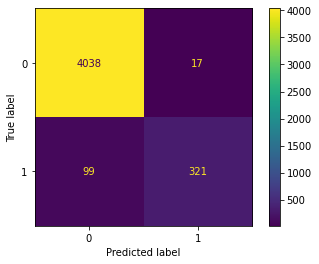

In [ ]:
print("True Negative    : ", SVM_Confusion_Matrix[0,0])
print("False Negative   : ", SVM_Confusion_Matrix[1,0])
print("True Positive    : ", SVM_Confusion_Matrix[1,1])
print("False Positive   : ", SVM_Confusion_Matrix[0,1])

print("\nAccuracy         : ", SVM_Accuracy)
print("Recall           : ", SVM_Recall)
print("Precision        : ", SVM_Precision)
print("F1 Score         : ", SVM_Score)

print("\nTest set R-square value : {:.2f}".format(SVM_model.score(X_test, y_test)))

print("Cross Validation : ", SVM_Cross_Val)

print("\nConfusion Matrix : ")
print(SVM_Confusion_Matrix)
plot_confusion_matrix(SVM_model, X_test, y_test)


 SVM ROC Curve:


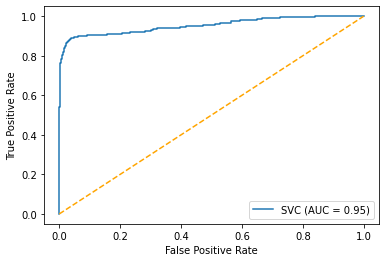

In [ ]:
print("\n SVM ROC Curve:")
metrics.plot_roc_curve(SVM_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification with Adaboost Classifier

In [ ]:
#  Creating a Model with configuration
adaBoost_Model = AdaBoostClassifier(n_estimators = 100, random_state = 1124)

# Model Fit
start_time = time.time()
adaBoost_Model.fit(X = X_train, y = y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))
Adaboost_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = adaBoost_Model.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time  : {:.2}".format(elapsed_time))
Adaboost_testing_time = elapsed_time

# Model Evaluation
Adaboost_Accuracy         = accuracy_score(y_test, y_predicted)
Adaboost_Recall           = recall_score(y_test, y_predicted, average = "weighted")
Adaboost_Precision        = precision_score(y_test, y_predicted, average = "weighted")
Adaboost_Score            = f1_score(y_test, y_predicted, average = 'micro')
Adaboost_Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Adaboost_Cross_Val        = cross_val_score(AdaBoostClassifier(n_estimators = 100, random_state = 42), X_train, y_train, cv = 10)

Training Time    : 3.4
Testing Time  : 0.088


True Negative    :  4031
False Negative   :  71
True Positive    :  349
False Positive   :  24

Accuracy         :  0.9787709497206704
Recall           :  0.9787709497206704
Precision        :  0.9782769557364679
F1 Score         :  0.9787709497206704

Test-set R-square value : 0.98
Cross Validation :  [0.97691735 0.98212956 0.97840655 0.97839046 0.97913562 0.98137109
 0.98435171 0.97242921 0.97913562 0.97317437]

Confusion Matrix : 
[[4031   24]
 [  71  349]]


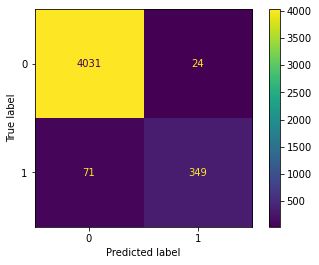

In [ ]:
print("True Negative    : ", Adaboost_Confusion_Matrix[0,0])
print("False Negative   : ", Adaboost_Confusion_Matrix[1,0])
print("True Positive    : ", Adaboost_Confusion_Matrix[1,1])
print("False Positive   : ", Adaboost_Confusion_Matrix[0,1])

print("\nAccuracy         : ", Adaboost_Accuracy)
print("Recall           : ", Adaboost_Recall)
print("Precision        : ", Adaboost_Precision)
print("F1 Score         : ", Adaboost_Score)

print("\nTest-set R-square value : {:.2f}".format(adaBoost_Model.score(X_test, y_test)))

print("Cross Validation : ", Adaboost_Cross_Val)

print("\nConfusion Matrix : ")
print(Adaboost_Confusion_Matrix)
plot_confusion_matrix(adaBoost_Model, X_test, y_test)


 AdaBoost ROC Curve:


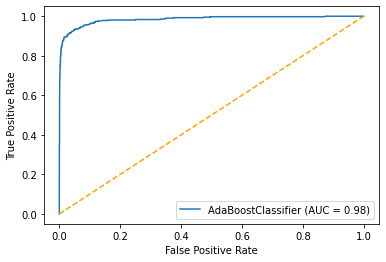

In [ ]:
print("\n AdaBoost ROC Curve:")
metrics.plot_roc_curve(adaBoost_Model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Comparing the results of the above used Classifier Algorithms



# Plotting graphs - Computational Times for both training and testing

# Comparing Training Time

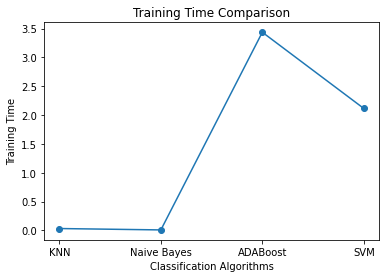

In [ ]:
algos = ['KNN', 'Naive Bayes','ADABoost','SVM']
training_times = [KNN_training_time, Naive_Bayes_training_time, Adaboost_training_time, SVM_training_time]
plt.plot(algos,training_times,'-o')
plt.title('Training Time Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Training Time')
plt.show()

# Comparing Testing Time

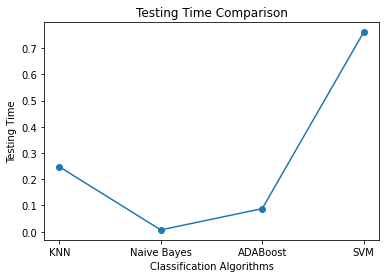

In [ ]:
algos = ['KNN', 'Naive Bayes','ADABoost','SVM']
testing_times = [KNN_testing_time, Naive_Bayes_testing_time, Adaboost_testing_time, SVM_testing_time]
plt.plot(algos,testing_times,'-o')
plt.title('Testing Time Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Testing Time')
plt.show()

# Comparing Accuracy of all the models

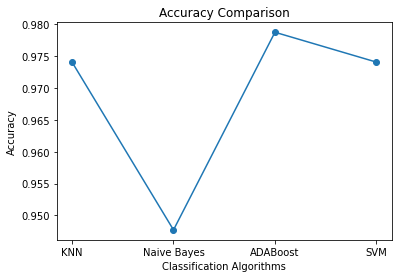

In [ ]:
algos = ['KNN', 'Naive Bayes', 'ADABoost','SVM']
Accuracy_values = [KNN_Accuracy, Naive_Bayes_Accuracy, Adaboost_Accuracy, SVM_Accuracy]
plt.plot(algos,Accuracy_values,'-o')
plt.title('Accuracy Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.show()

# Comparing Precision of all the models

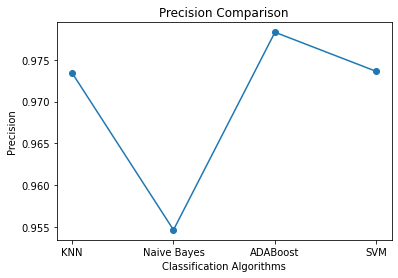

In [ ]:
algos = ['KNN', 'Naive Bayes', 'ADABoost','SVM']
Precision_values = [KNN_Precision, Naive_Bayes_Precision, Adaboost_Precision, SVM_Precision]
plt.plot(algos,Precision_values,'-o')
plt.title('Precision Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Precision')
plt.show()

# Comparing Recall of the models

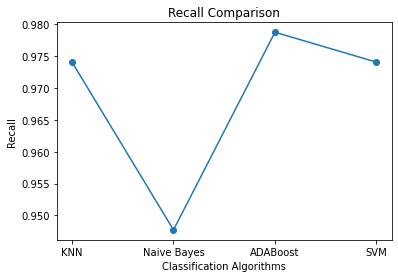

In [ ]:
algos = ['KNN', 'Naive Bayes', 'ADABoost','SVM']
Recall_values = [KNN_Recall, Naive_Bayes_Recall, Adaboost_Recall, SVM_Recall]
plt.plot(algos,Recall_values,'-o')
plt.title('Recall Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Recall')
plt.show()

# Comparing F1 Score of all the models

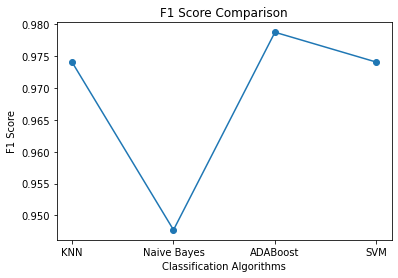

In [ ]:
algos = ['KNN', 'Naive Bayes', 'ADABoost','SVM']
F1_Score_values = [KNN_Score, Naive_Bayes_Score, Adaboost_Score, SVM_Score]
plt.plot(algos,F1_Score_values,'-o')
plt.title('F1 Score Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('F1 Score')
plt.show()

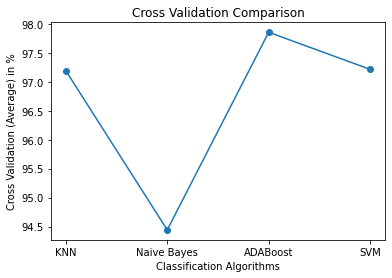

In [ ]:
algos = ['KNN', 'Naive Bayes', 'ADABoost','SVM']
cross_val_avg = [(sum(KNN_Cross_Val)/len(KNN_Cross_Val))*100, (sum(Naive_Bayes_Cross_Val)/len(Naive_Bayes_Cross_Val))*100, (sum(Adaboost_Cross_Val)/len(Adaboost_Cross_Val))*100, (sum(SVM_Cross_Val)/len(SVM_Cross_Val))*100]
plt.plot(algos,cross_val_avg,'-o')
plt.title('Cross Validation Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Cross Validation (Average) in %')
plt.show()